In [75]:
# 1. BUSINESS UNDERSTANDING

## 1.1 Project Overview

This project aim to build a model that will predict whether a customer is likely to  leave SyriaTel soon


## 1.2 Problem Statement

SyriaTel, a telecommunications company, is dealing with a critical concern which is customer churn. This poses threats to revenue, and deepens the issue of long-term sustainability. They are presented with the task of determining which customers are most likely to stop using their services, as well as understanding the reasons why these choices are made so that the company can address these concerns.

## 1.3 Objectives

### 1.4 Main Objectives

To analyze customer behaviour,call usage and the interaction with customer services inorder to discover factors contributing to customer churn behaviour

### 1.5 Specific Objectives

Other specific objectives include:

  1. Identify how the number of customer service interactions relates to the probabilities of customer churn for your business.
  2. Examine the elements that lead to customer churn and estimate the clients poised to exit.
  3. To examine customer behavour by analyzing day,night calls and their correlation to churn
  4. To identify the relationship between the charge and the charge both during the day and the night
  5. To identify if customers from international calls are likely to churn more
  6. To identify the relationship between the day/night minutes and there charge

# 2. DATA UNDERSTANDING

## 2.0 Import Libraries

In [2]:
##Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') 

 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 2.1 Load DataSet

In [3]:
##Load the csv data set
df=pd.read_csv("bigml.csv")
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [4]:
##Check the head
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
##Check the tail
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


Observation:The dataset is not corrupted hence it is uniform from Top to bottom

In [6]:
##Check the shape attribute
df.shape

(3333, 21)

In [7]:
print(f"The dataset has row of {df.shape[0]} and columns of {df.shape[1]}")

The dataset has row of 3333 and columns of 21


In [8]:
##checking the datatypes
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

OBSERVATION:We can see that the churn column is boolean meaning that it has two unique values

In [9]:
##checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [10]:
##Checking the columns
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

Observation:The columns are well written with no mixture of upper and lowercase

In [11]:
##Checking the statistical summary and transpose
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


# 3. DATA PREPARATION

## 3.0 Data Cleaning

In [12]:
##Checking for unique values in the categorical values
df.groupby("churn")["churn"].count()

churn
False    2850
True      483
Name: churn, dtype: int64

In [13]:
##Checking for unique values in the categorical values
df.groupby("international plan")["international plan"].count()

international plan
no     3010
yes     323
Name: international plan, dtype: int64

In [14]:
df.groupby("voice mail plan")["voice mail plan"].count()

voice mail plan
no     2411
yes     922
Name: voice mail plan, dtype: int64

In [15]:
##Checking for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Observation:No missing values

In [16]:
##Check for duplicates
df.duplicated().sum()

0

Note:No duplicates

In [17]:
##Drop unnecessary column
del df["phone number"]

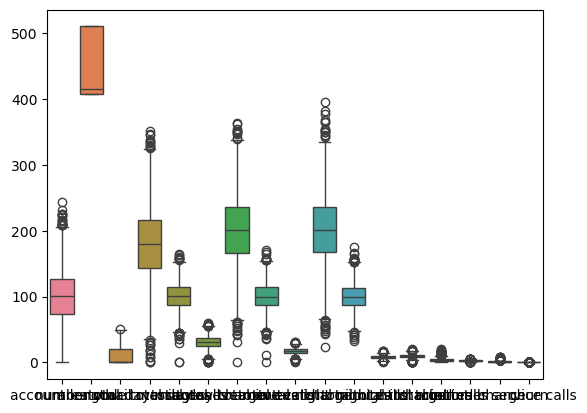

In [18]:
##Check for outliers
sns.boxplot(df);

NOTE :  I will remove outliers from numerical data only eg account length
        Some outliers are healthy while others are not

In [19]:
##identify numerical columns except area code
numerical_cols = df.select_dtypes(include=['number']).columns.drop("area code")
numerical_cols

Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls'],
      dtype='object')

NOTE:I want to perform iqr in all columns in order to remove outliers except from area code which i consider that Applying IQR could remove valid data, which is not desirable for identifiers



In [20]:
# Compute Q1 (25th percentile) and Q3 (75th percentile) for all numerical columns
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers (keeping "area code" unchanged)
df_cleaned = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]

# Display the shape before and after removing outliers
print(f"Original dataset shape {df.shape[0]} rows and {df.shape[1]} columns")
print(f"Cleaned dataset shape {df_cleaned.shape[0]} rows and {df_cleaned.shape[1]} columns")


Original dataset shape 3333 rows and 20 columns
Cleaned dataset shape 2804 rows and 20 columns


In [21]:
# Save the cleaned dataset
df_cleaned.to_csv("cleaned_bigml.csv", index=False)
df_cleaned.head()
## I have used index=False Avoids an extra, unnecessary column in the output file.

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False


# 4. EDA

## Here i will be able to perform the following activities 
* Univariate analysis 
* Bivarite analysis 
* Multivariate analysis

In [22]:
##load the clean data set
df5=pd.read_csv("cleaned_bigml.csv")
df5

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
4,AL,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2800,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2801,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
2802,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


## 4.1 UNIVARIATE ANALYSIS

### 4.1.1 Analysis on top 5 states with the highest Counts

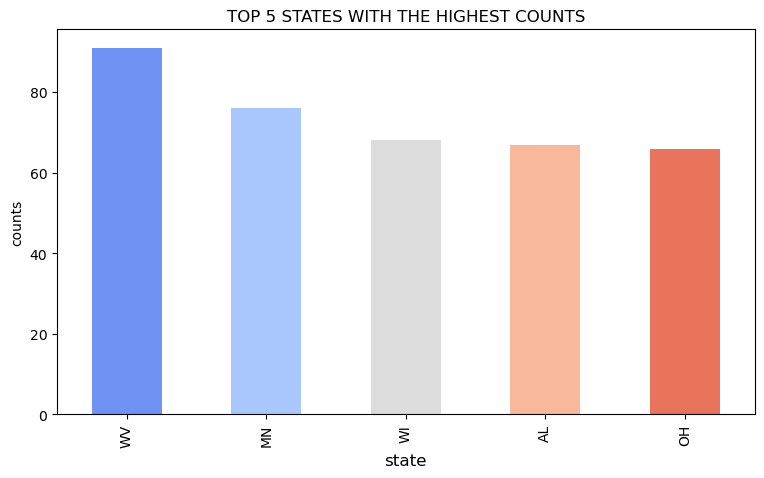

In [23]:
TOP_5_States=df5["state"].value_counts().head(5).plot(kind='bar',figsize=(9,5),color=sns.color_palette("coolwarm", 5))
sns.set_palette('Blues')
plt.title("TOP 5 STATES WITH THE HIGHEST COUNTS")
plt.ylabel("counts") 
plt.xlabel('state',fontsize=12)
plt.show;

### 4.1.2 Analysis on the counts of churn

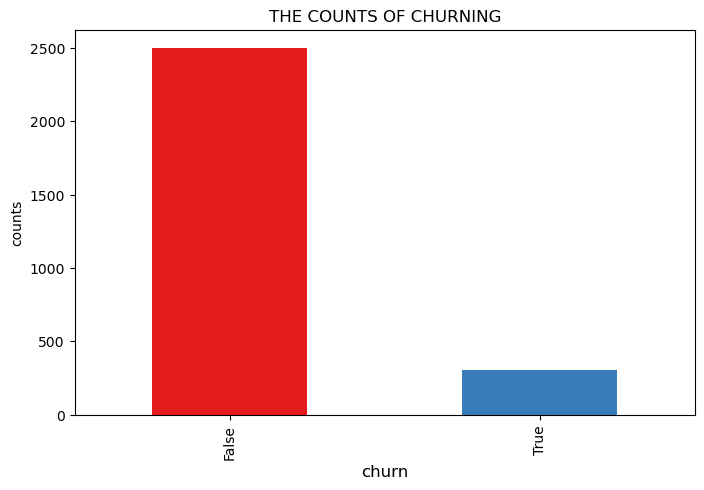

In [24]:
df5["churn"].value_counts().plot(kind='bar',figsize=(8,5),color=sns.color_palette("Set1", 2))
sns.set_palette('Set1')
plt.title("THE COUNTS OF CHURNING")
plt.ylabel("counts")
plt.xlabel('churn',fontsize=12)
plt.show;

OBSERVATION: People who are likely to churn are less than the others

## 4.2 BIVARIATE ANALYSIS

This is the analysis of two variable

### 4.2.1 Analysis on top 5 states with the highest total night charge

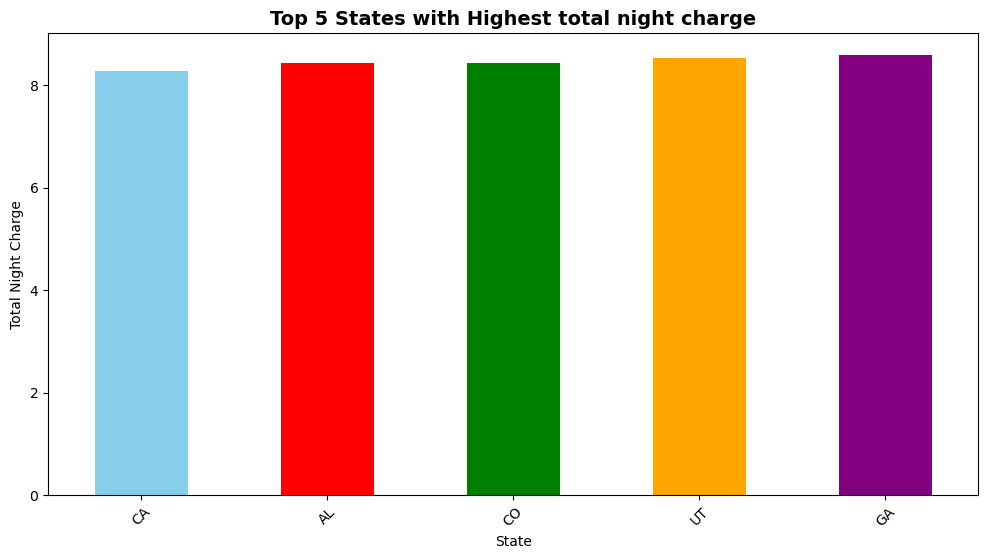

In [25]:


colors = ['skyblue', 'red', 'green', 'orange', 'purple']

plt.figure(figsize=(12, 6))

df5.groupby("state")["total night charge"].mean().sort_values(ascending=True).head(5) \
.plot(kind='bar', color=colors)

plt.title("Top 5 States with Highest total night charge", fontsize=14, fontweight='bold')

plt.ylabel("Total Night Charge")

plt.xlabel("State")

plt.xticks(rotation=45)
          
plt.show()


OBSERVATION:
* The night charge values appear to be very similar across the states, with minimal variation.

### 4.2.3 Analysis on top 10 states with the highest churn

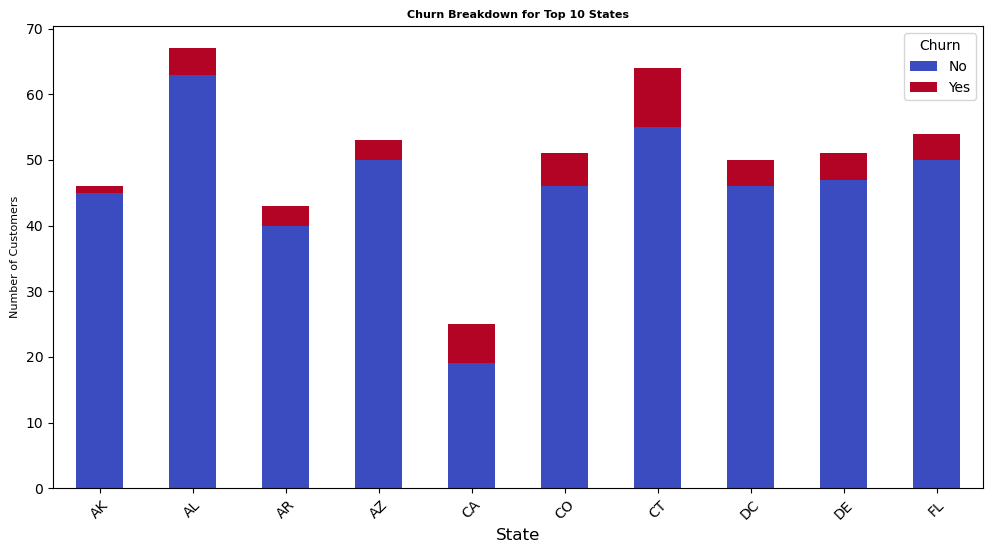

In [26]:
# Count churn by state
churn_state = df5.groupby(["state", "churn"]).size().unstack()

# Plot
churn_state.head(10).plot(kind='bar', stacked=True, figsize=(12, 6), colormap="coolwarm")

# Titles and labels
plt.title("Churn Breakdown for Top 10 States", fontsize=8, fontweight='bold')
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Customers", fontsize=8)
plt.xticks(rotation=45)
plt.legend(title="Churn", labels=["No", "Yes"])

# Show plot
plt.show()


OBSERVATION:
* The blue portion represents customers who have not churned, while the red portion represents those who have churned.
* The state with the highest total number of customers also has one of the highest numbers of customer churn, which indicates that having a high number of customers   does not hinder or reduce the process of customer churn.
* There are some states with a relatively lower rate of churn, indicating greater customer retention within those specific states.

### 4.2.4 Analysis on top 10 states with the highest customer srvice calls 

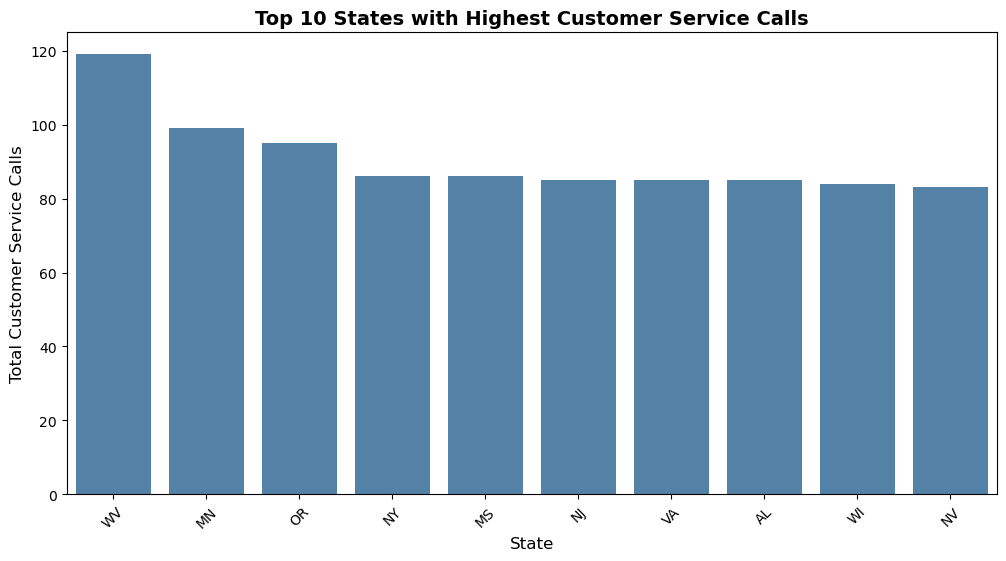

In [27]:
# Count customer service calls per state
top_service_calls = df5.groupby("state")["customer service calls"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_service_calls.index, y=top_service_calls.values, color='steelblue')

# Titles and labels
plt.title("Top 10 States with Highest Customer Service Calls", fontsize=14, fontweight='bold')
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Customer Service Calls", fontsize=12)
plt.xticks(rotation=45)

# Show plot
plt.show()


OBSERVATION: West Virginia (WV) has the highest number of customer service calls, followed by Minnesota (MN) and Oregon (OR)

### 4.2.5 Analysis on total day minutes and total day charge

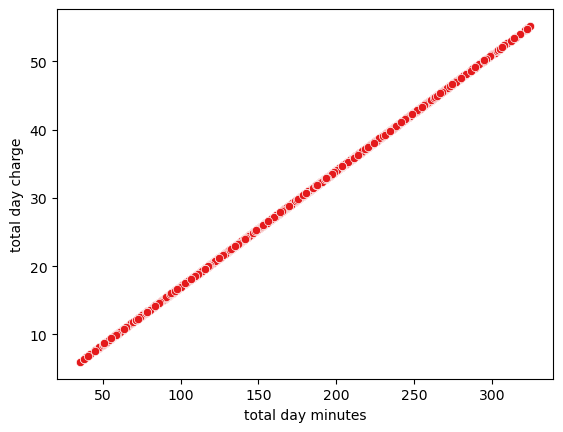

In [28]:
##using scatter plot
sns.scatterplot(data=df5, x='total day minutes', y='total day charge');


 OBSERVATION:This shows a positive correlation between total day minutes and total day charge¶ which means that if one variable increases the other one will also increase

### 4.2.6 Analysis on total night minutes and total night charge

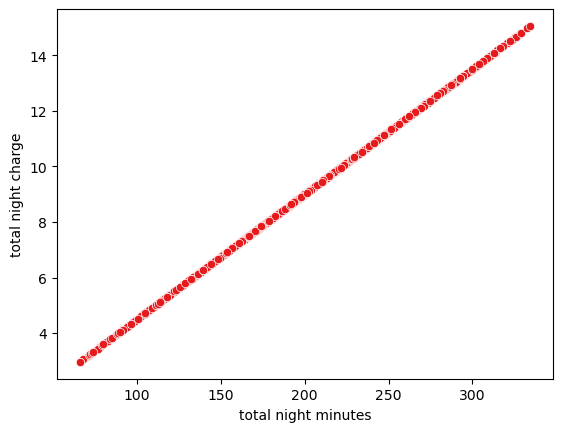

In [29]:
##using scatter plot
sns.scatterplot(data=df5, x='total night minutes', y='total night charge');

OBSERVATION: This shows a positive correlation between  total night minutes and total night charge which means that if one variable increases the other one will also increase

### 4.2.6 Analysis on international plan  and churn

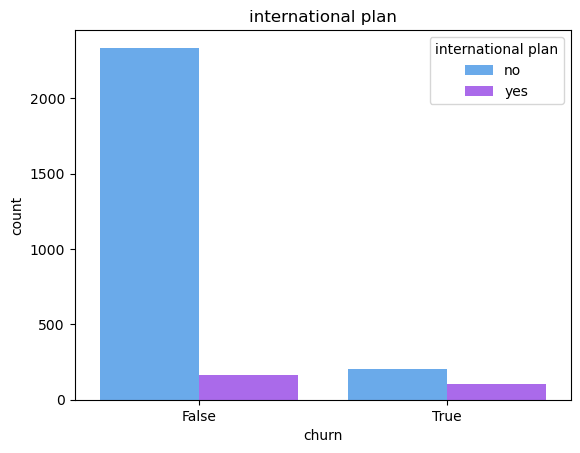

international plan,no,yes
churn,,
False,2335,164
True,201,104


In [30]:
##using count plot
sns.countplot(x=df5["churn"],hue=df5["international plan"], palette="cool")
plt.title("international plan")
plt.show()
cort=pd.crosstab(df5["churn"],df5["international plan"])
cort
              

OBSERVATION: A majority (2335) of customers who did not churn have no international plan.
             Only 164 non-churn customers have an international plan.
             A significant number of churned customers (201) do not have an international plan.
             However, 104 churned customers do have an international plan, which indicates that some customers with an international plan still ended up churning.
             

## 4.3 MULTIVARIATE ANALYSIS

This is the analysis of more than two variable

### 4.3.1 Analyzing Relationship Between international plan,total intl minutes' and churn

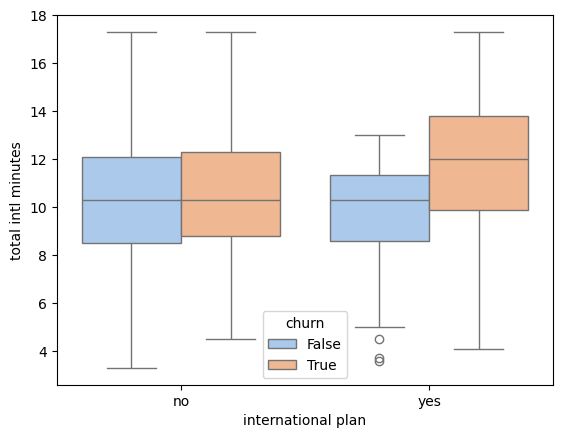

In [31]:
sns.boxplot(data=df5, x='international plan', y='total intl minutes', hue='churn',palette='pastel')
plt.legend
plt.show()


OBSERVATION: 
* The box plot visualizes the relationship between having an international plan (0 = No, 1 = Yes) and total international minutes, categorized by customer churn       (True/False).
* Customers with an international plan (1) tend to have a higher median total international minutes compared to those without a plan.
* Churned customers tend to have a higher total international minutes, especially for those with an international plan.

# 5. MODELLING 

In this section of modelling i will be able to conduct two model that is:
* Logistic Regression
* Decision Tree

## 5.1 LOGISTIC REGRESSION

### A. WITHOUT ADRESSING CLASS IMBALANCE

## Activities i will conduct
* I will be able to perform one hot encoding on the Predictor Variable or the Feature(preprocessing)
* I will also convert the target variable which is categorical variable into 0,1,2 etc
* Divide the data into target and predictor
* Split the data into train and test
* scalling
* Modelling
* Getting the shapes
* Predict
* Check the accuracy
* confusion matrix
* Classification Report

In [34]:
##Import the relevant libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE


In [35]:
##Load our dataset
df10=pd.read_csv("cleaned_bigml.csv")
df10

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
4,AL,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2800,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2801,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
2802,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [36]:
df10 = pd.read_csv("cleaned_bigml.csv", dtype={"international plan": str, "voice mail plan": str})

#### 5.1.1 Preprocessing

*  I will Convert categorical variables (international plan, voice mail plan) into numerical format.
* I will Convert churn (target variable) into a binary numerical format (False → 0, True → 1).
* I will also drop state because it has too many categorical variables

In [37]:
##From the data set lets drop state because it has too many categorical variables
df10.drop(columns=['state'], inplace=True)

# Convert categorical variables to numeric
df10['international plan'] = df10['international plan'].map({'no': 0, 'yes': 1})
df10['voice mail plan'] = df10['voice mail plan'].map({'no': 0, 'yes': 1})
df10['churn'] = df['churn'].astype(int)  # Convert False/True to 0/1

In [38]:
##The state column has been removed
df10

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
2800,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,1
2801,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
2802,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


OBSERVATION:It has been converted to numeric

#### 5.1.2 Split the data into target and Predictor

In [39]:
#Split the data into target and predictor
x=df10.drop("churn",axis=1)
y=df10["churn"]


#### 5.1.3 Split the data into train,test and split

In [40]:
##split the data into train,test and split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42) ### I have used 20% of data to test and 80% to train with a random_state of 42
                                                                                   ##I will be adjusting the test size and random_state untill i get the highest accuracy

#### 5.1.4 Scalling

In [41]:
##Scalling 
##We scale only the features not target
##We perform it on the features only and not target both the x_train and x_test
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)


#### 5.1.5 Build Model

In [42]:
#Build the model
model = LogisticRegression()
model.fit (x_train_sc,y_train)

LogisticRegression()

#### 5.1.6 Predict

In [43]:
#Predict
y_predict=model.predict(x_test_sc)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
##the original
y

0       0
1       0
2       0
3       0
4       0
       ..
2799    0
2800    1
2801    0
2802    0
2803    0
Name: churn, Length: 2804, dtype: int32

#### 5.1.7 Accuracy

In [45]:
##We can check the model evaluation and round off to the nearest 2 dplaces
round(accuracy_score(y_test,y_predict),2) *100

89.0

In [46]:
##using print function
print(f"The accuracy score is {round(accuracy_score(y_test, y_predict) * 100, 2)} %")


The accuracy score is 89.32 %


OBSERVATION:It is a better model perfomance since it is closer to 100 %

#### 5.1.8 Confusion matrix

In [47]:
##confusion matrix
logistic_matrix=confusion_matrix(y_test,y_predict)
logistic_matrix

array([[251,   0],
       [ 30,   0]], dtype=int64)

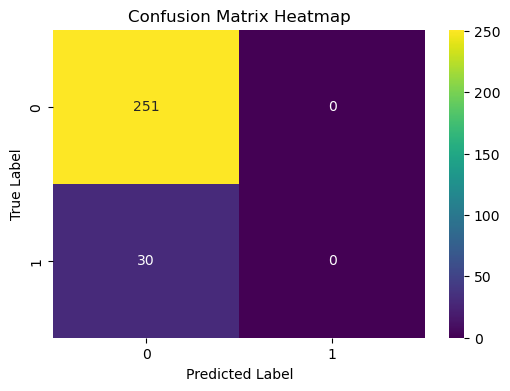

In [48]:
#In a heat maps
logistic_matrix=confusion_matrix(y_test,y_predict)

plt.figure(figsize=(6, 4))
logistic_matrix=sns.heatmap(logistic_matrix, annot=True, fmt='g', cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

OBSERVATION: 251 is true positive,0True Negative,30 is False Negative, 0 is False positive

### B.ADRESSING CLASS IMBALANCE

* I will use smote technique

In [49]:
# call SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Check the new class distribution
print('Class distribution after SMOTE:')
print(pd.Series(y_train_smote).value_counts())


Class distribution after SMOTE:
churn
0    2153
1    2153
Name: count, dtype: int64


OBSERVATION:The class is balanced

In [50]:
# call the Logistic Regression model
smote_model = LogisticRegression()

In [51]:
# Train the model on the SMOTE data
model = LogisticRegression( max_iter=50000)

smote_model.fit(x_train_smote, y_train_smote)


LogisticRegression()

In [52]:

# Make predictions
y_pred_smote = smote_model.predict(x_test)


In [53]:
# Accuracy
accuracy_smote = accuracy_score(y_test, y_pred_smote)
accuracy_smote

0.4875444839857651

In [54]:
##using print
print(f"The accuracy score of the SMOTE model is {accuracy_score(y_test, y_pred_smote):.2f}")


The accuracy score of the SMOTE model is 0.49


In [55]:
# Classification Report
print('SMOTE Model Classification Report:')
print(classification_report(y_test, y_pred_smote))


SMOTE Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.49      0.63       251
           1       0.10      0.47      0.16        30

    accuracy                           0.49       281
   macro avg       0.49      0.48      0.40       281
weighted avg       0.80      0.49      0.58       281



OBSERVATION:

* Decreased Overall Accuracy (from 89% to 49%):

This is because the model is currently making a larger proportion of errors on class 0, which represents non-churn customers. 
Precision by itself has now been shown to be an unsatisfactory metric in the present scenario, primarily because it used to get artificially boosted and biased previously due to the natural skewness present in the data.

    
* Decreased precision for Class 1 (0.10):

The model currently believes that some customers will depart, but most of those predictions are incorrect.
Precision indicates the number of customers we predicted would churn who actually churned. Low precision reflects high false positives (predicted churn when there isn't any)

## 5.2 DECISON TREES

### WITH A TUNED HYPERPARAMETER(max_depth) 

I will be able to perform the following activities:
* preprocessing
* Divide the data into target and predictor
* Split the data into train and split
* Cheking the shape
* Modelling
* Predict
* Accuracy checking
* Confusion_matrix
* Report 
* Visualization

In [57]:
#import libraries relevant libraries in decision trees
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [58]:
##Load our dataset
df20=pd.read_csv("cleaned_bigml.csv")
df20

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
4,AL,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2800,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2801,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
2802,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


#### 5.2.1 Preprocessing

* I will Convert categorical variables (international plan, voice mail plan) into numerical format.
* I will Convert churn (target variable) into a binary numerical format (False → 0, True → 1).
* I will also drop state because it has too many categorical variables

In [59]:
##Ensures that "international plan" and "voice mail plan" columns are read as strings
df20= pd.read_csv("cleaned_bigml.csv", dtype={"international plan": str, "voice mail plan": str})

In [60]:
##check the head
df20.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
4,AL,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False


In [61]:
#From the data set lets drop state because it has too many categorical variables
df20.drop(columns=['state'], inplace=True)

# Convert categorical variables to numeric using map
df20['international plan'] = df20['international plan'].map({'no': 0, 'yes': 1})
df20['voice mail plan'] = df20['voice mail plan'].map({'no': 0, 'yes': 1})
df20['churn'] = df20['churn'].astype(int)  # Convert False/True to 0/1, ###convert to int since it is in form of categorical

In [62]:
##Confirm if international plan ,churn and voice mail plan have been changed to categorical variables
df20.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0


#### 5.2.2 Split the data into target and Predictor

In [63]:
#Split the data into target and predictor
x=df10.drop("churn",axis=1)      ### we use axis=1 because it is in the column and not row
y=df10["churn"]


In [64]:
##Confirm if churn has been removed
x

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
2800,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
2801,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
2802,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


#### 5.2.3 Split the data into train and test

In [65]:
#split dataset into train and test   
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42) 

observation:i have used test_size of 20% and random state of 42 because it gives high accuracy eg 42 and 30% gives accuracy of 73% which is low comapred to 75

#### 5.2.4 Check the shape

In [66]:
##Checking the shape
print(x_train.shape,x_test.shape)
print(y_train.shape, y_test.shape)

(2243, 18) (561, 18)
(2243,) (561,)


observation:The shape is the same in x_test and y_test,x_train and y_train

#### 5.2.5 Modelling

In [67]:
#modeling
model = DecisionTreeClassifier(max_depth=6,criterion='entropy')
#train
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

#### 5.2.6 Predict

In [68]:
#predict 
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [69]:
#The original values
y

0       0
1       0
2       0
3       0
4       0
       ..
2799    0
2800    1
2801    0
2802    0
2803    0
Name: churn, Length: 2804, dtype: int32

#### 5.2.7 Accuracy

In [70]:
#accuracy in 2 dp
print(f"The accuracy score is {accuracy_score(y_test, y_pred)*100:.2f} %")


The accuracy score is 86.27 %


#### 5.2.8 Confusion matrix

In [71]:
#confusion matrix
print(confusion_matrix(y_test, y_pred))

[[484   5]
 [ 72   0]]


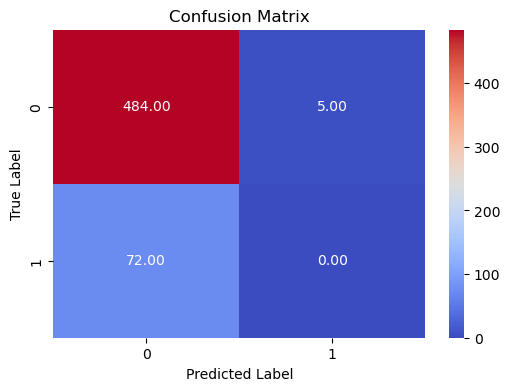

In [72]:
Decisiontree_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(Decisiontree_matrix, annot=True, fmt='.2f', cmap='coolwarm')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### 5.2.9 classification report

In [73]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       489
           1       0.00      0.00      0.00        72

    accuracy                           0.86       561
   macro avg       0.44      0.49      0.46       561
weighted avg       0.76      0.86      0.81       561



#### 5.3 Visualization

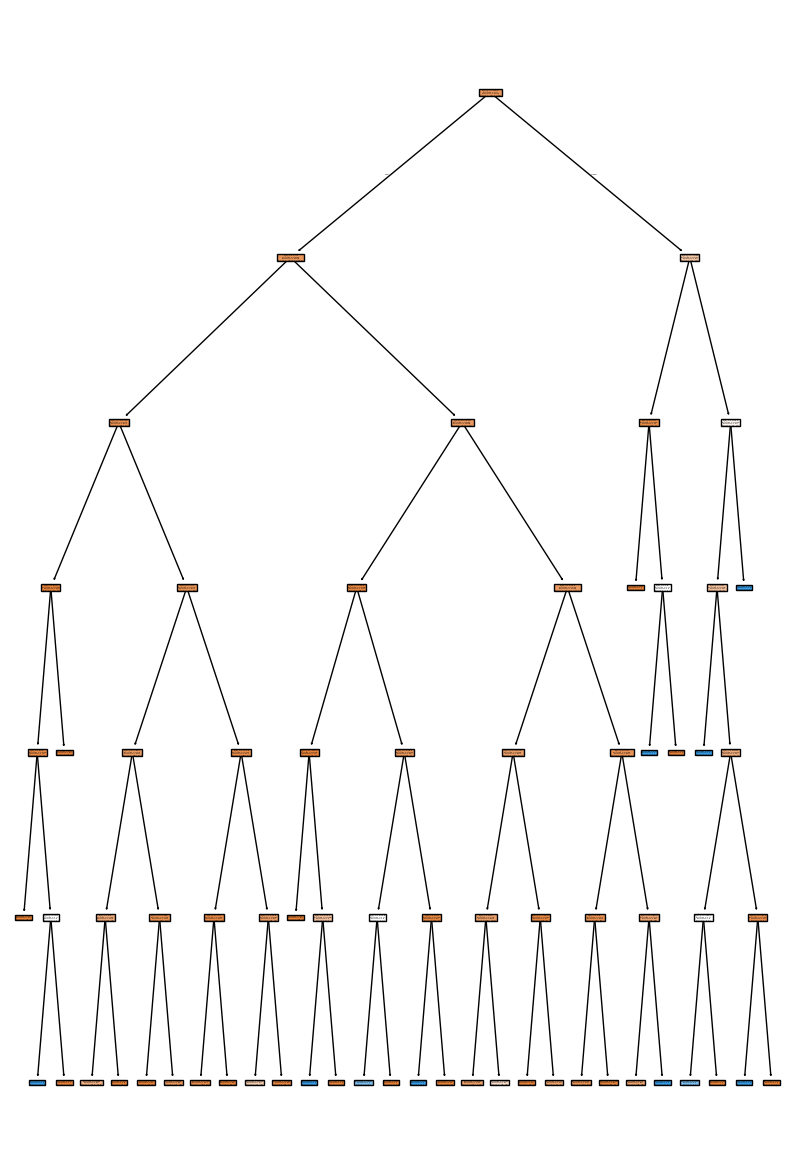

In [74]:
#visualizations
plt.figure(figsize= (10,15))
tree.plot_tree(model, filled= True)
plt.show()

OBSERVATION BEFORE HYPER PARAMETER

* There is much splitting 
* When entropy is zero is considered pure hence no more splitting is required
* The accuracy score is 75 % which may be misleading because of class imbalanced
* Precision: 0.88 – When the model predicts class 0, it's correct 88% of the time.
* Recall: 0.82 – The model correctly identifies 82% of the actual class 0 instances.
* F1-score: 0.85 – The harmonic mean of precision and recall indicates a balanced performance for class 0.

  
OBSERVATION BEFORE HYPER PARAMETER TUNING(max_depth)
* The accuracy score raises to 89%. Higher overall accuracy due to the overwhelming correct classification of class 0.
* There is less splitting after using hyper parameter(max_depth)
* Precision: 0.87 – Remains similar to before.
* Recall: 0.99 – Nearly all actual class 0 instances are now correctly identified.
* F1-score: 0.93 – Indicates very strong performance on class 0.






# 6.EVALUATION

* The best performing model is decision tree because it has the highest accuracy level keeping in mind that i have compared it when the class is balance
* Also it has the highest number of true positive